In [1]:
#importo las librerias necesarias. Eso es un comentario. Toda linea que comience con # sera un comentario que Python no intentara ejecutar
import geopandas
import matplotlib.pyplot 

%matplotlib inline

In [3]:
'''leo el shapefile utilizando la funcion read_file() de la libreria geopandas y lo guardo en la variable radios
Noten que utilizo triple comilla para introducir un comentario que va a llevar varias lineas
Vean que la ruta del archivo del shape utiliza la estructura de MI disco local en mi computadora
Como estoy dentro de analisis_espacial_python_2019/clase_0/notebooks
tengo que ir un nivel anterior al directorio carto/ donde esta el directorio informacion-censal-por-radio-2010/'''

radios = geopandas.read_file("../carto/informacion-censal-por-radio-2010/informacion_censal_por_radio_2010.shp")

In [4]:
#visualizo los primeros registros de mi variable radios
radios.head()

,RADIO_I,BARRIO,COMUNA,POBLACI,VIVIEND,HOGARES,HOGARES_,AREA_KM,geometry
0,1_1_1,RETIRO,1,336.0,82.0,65.0,19.0,1.798997,"POLYGON ((-58.37189 -34.59199, -58.37202 -34.5..."
1,1_12_1,SAN NICOLAS,1,341.0,365.0,116.0,25.0,0.018565,"POLYGON ((-58.38593 -34.60444, -58.38575 -34.6..."
2,1_12_10,SAN NICOLAS,1,296.0,629.0,101.0,1.0,0.044380,"POLYGON ((-58.37879 -34.60528, -58.37741 -34.6..."
3,1_12_11,SAN NICOLAS,1,528.0,375.0,136.0,7.0,0.366340,"POLYGON ((-58.36733 -34.60562, -58.36713 -34.6..."
4,1_12_2,SAN NICOLAS,1,229.0,445.0,129.0,16.0,0.018363,"POLYGON ((-58.38454 -34.60436, -58.38311 -34.6..."


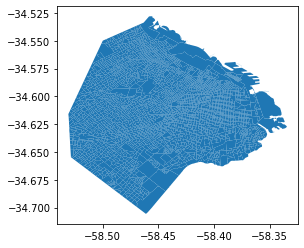

In [5]:
#realizo un primer plot sencillo de mi shape
radios.plot()

In [6]:
#en algunos casos fue necesario instalar la libreria mapclassify para poder mapear nuestro shape. Si ese es el caso corran esta celda, ELIMINANDO EL # al comienzo antes del ! y mantengan el !
#!pip install mapclassify

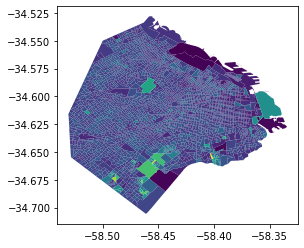

In [7]:
#realizo otro plot sin especificar algun criterio de visualizacion
radios.plot(column = "POBLACI")

/home/pipe/anaconda3/lib/python3.7/site-packages/pysal/explore/segregation/network/network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
/home/pipe/anaconda3/lib/python3.7/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


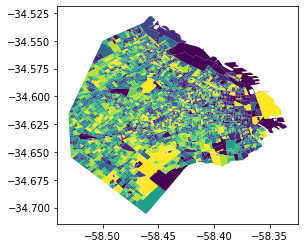

In [8]:
#realizo un plot especificando criterios de visualizacion de 10 quintiles 
radios.plot(column = "POBLACI", scheme = "Quantiles", k = 10)

In [9]:
#reproyecto mi shape a una proyeccion en metros. Pueden leer mas en: http://epsg.io/3857
radios_metros = radios.to_crs(epsg = 3857)
radios_metros.head()

,RADIO_I,BARRIO,COMUNA,POBLACI,VIVIEND,HOGARES,HOGARES_,AREA_KM,geometry
0,1_1_1,RETIRO,1,336.0,82.0,65.0,19.0,1.798997,"POLYGON ((-6497929.484 -4108572.020, -6497943...."
1,1_12_1,SAN NICOLAS,1,341.0,365.0,116.0,25.0,0.018565,"POLYGON ((-6499491.512 -4110255.197, -6499471...."
2,1_12_10,SAN NICOLAS,1,296.0,629.0,101.0,1.0,0.044380,"POLYGON ((-6498696.826 -4110369.483, -6498543...."
3,1_12_11,SAN NICOLAS,1,528.0,375.0,136.0,7.0,0.366340,"POLYGON ((-6497420.916 -4110414.929, -6497399...."
4,1_12_2,SAN NICOLAS,1,229.0,445.0,129.0,16.0,0.018363,"POLYGON ((-6499336.819 -4110244.172, -6499178...."


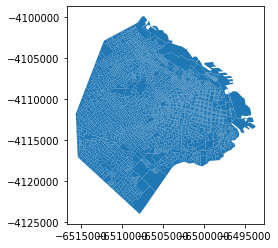

In [10]:
#los ejes de coordenadas ya nos nuestran un cambio de unidad de medida
radios_metros.plot()

In [11]:
#obtenemos el area de cada radio censal al extraer la PROPIEDAD geografica area de nuestra columna geometry. Area no lleva () porque es una propiedad, no una funcion. Veremos esto mas adelante.
radios_metros["area_m"] = radios_metros.geometry.area

In [12]:
#como nuestra proyeccion esta en metros y queremos pasarlo a km2, debemos dividir nuestra columna area en metros (area_m) por 1000000
radios_metros["area_km"] = radios_metros.area_m / 1000000

In [13]:
#finalmente dividimos nuestra poblacion por el area en km2
radios_metros['densidad'] = radios_metros.POBLACI / radios_metros.area_km

radios_metros.head()

,RADIO_I,BARRIO,COMUNA,POBLACI,VIVIEND,HOGARES,HOGARES_,AREA_KM,geometry,area_m,area_km,densidad
0,1_1_1,RETIRO,1,336.0,82.0,65.0,19.0,1.798997,"POLYGON ((-6497929.484 -4108572.020, -6497943....",2.660685e+06,2.660685,126.283256
1,1_12_1,SAN NICOLAS,1,341.0,365.0,116.0,25.0,0.018565,"POLYGON ((-6499491.512 -4110255.197, -6499471....",2.746859e+04,0.027469,12414.178936
2,1_12_10,SAN NICOLAS,1,296.0,629.0,101.0,1.0,0.044380,"POLYGON ((-6498696.826 -4110369.483, -6498543....",6.566604e+04,0.065666,4507.657512
3,1_12_11,SAN NICOLAS,1,528.0,375.0,136.0,7.0,0.366340,"POLYGON ((-6497420.916 -4110414.929, -6497399....",5.420509e+05,0.542051,974.078198
4,1_12_2,SAN NICOLAS,1,229.0,445.0,129.0,16.0,0.018363,"POLYGON ((-6499336.819 -4110244.172, -6499178....",2.717014e+04,0.027170,8428.368902


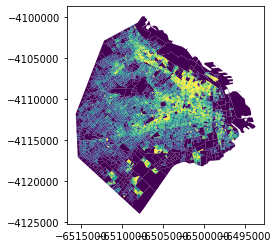

In [14]:
#ploteamos los resultados
radios_metros.plot(column = "densidad",scheme = "Quantiles", k = 10)